In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/diabetes.csv')

In [3]:
data.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

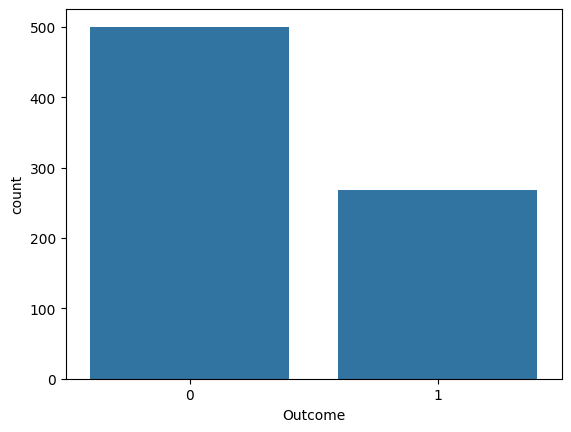

In [10]:
sns.countplot(x = data['Outcome'])

In [11]:
X = data.drop('Outcome', axis = 1)
y = data['Outcome']

In [12]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 42)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [19]:
make = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(max_iter=10000,random_state=42))])

In [21]:
 make.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=10000, random_state=42))])

In [23]:
y_test_pred = make.predict(X_test)
y_train_pred = make.predict(X_train)
y_pred_test_prob_log_reg = make.predict_proba(X_test)[:, 1]

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred , 'Predicted Probability': y_pred_test_prob_log_reg })
df

,Actual,Predicted,Predicted Probability
44,0,1,0.616674
672,0,0,0.112781
700,0,0,0.272540
630,1,0,0.286682
81,0,0,0.004481
...,...,...,...
32,0,0,0.045561
637,0,0,0.101016
593,0,0,0.136793
425,1,1,0.808330


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score,ConfusionMatrixDisplay

In [26]:
con = confusion_matrix(y_test, y_test_pred)
con

array([[82, 18],
       [26, 28]])

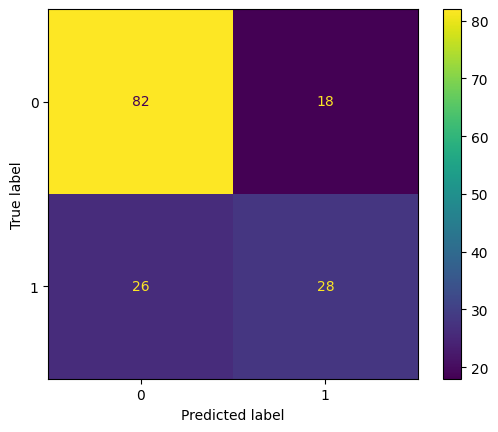

In [27]:
dis = ConfusionMatrixDisplay(confusion_matrix=con, display_labels=make.classes_)
dis.plot()

In [28]:
from sklearn.naive_bayes import GaussianNB
make2 = Pipeline([('scaler', StandardScaler()), ('model', GaussianNB())])
make2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', GaussianNB())])

In [29]:
y_test_pred = make2.predict(X_test)
y_train_pred = make2.predict(X_train)
y_pred_test_prob_log_reg = make2.predict_proba(X_test)[:, 1]

In [30]:
data3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred , 'Predicted Probability': y_pred_test_prob_log_reg })
data3

,Actual,Predicted,Predicted Probability
44,0,1,0.515927
672,0,1,0.502792
700,0,0,0.204928
630,1,0,0.130003
81,0,0,0.005869
...,...,...,...
32,0,0,0.009346
637,0,0,0.030233
593,0,0,0.409314
425,1,1,0.984446


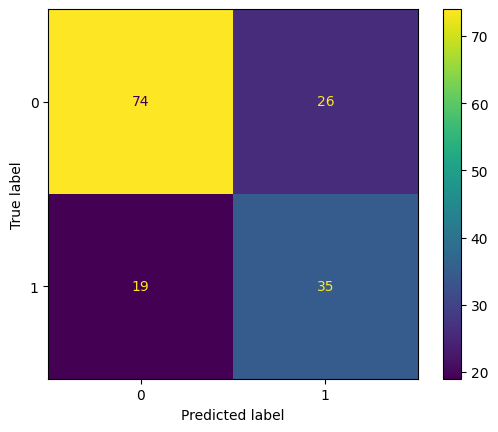

In [31]:
con2 = confusion_matrix(y_test, y_test_pred)
con2
dis2 = ConfusionMatrixDisplay(confusion_matrix=con2, display_labels=make2.classes_)
dis2.plot()

In [32]:
from sklearn.neighbors import KNeighborsClassifier
make3 = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsClassifier())])
make3.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])

In [33]:
y_test_pred = make3.predict(X_test)
y_train_pred = make3.predict(X_train)
y_pred_test_prob_log_reg = make3.predict_proba(X_test)[:, 1]

In [34]:
data4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred , 'Predicted Probability': y_pred_test_prob_log_reg })
data4

,Actual,Predicted,Predicted Probability
44,0,1,0.8
672,0,0,0.0
700,0,0,0.2
630,1,0,0.2
81,0,0,0.2
...,...,...,...
32,0,0,0.0
637,0,0,0.2
593,0,0,0.0
425,1,1,0.8


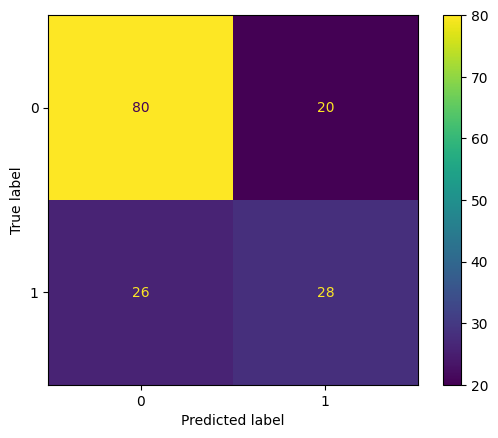

In [35]:
con4 = confusion_matrix(y_test, y_test_pred)
con4
dis4 = ConfusionMatrixDisplay(confusion_matrix=con4, display_labels=make3.classes_)
dis4.plot()

In [44]:
from sklearn.model_selection import GridSearchCV
para = {
    'model__n_neighbors': range(1, 31)
}

In [45]:
grid = GridSearchCV(make3, param_grid=para, cv=5,scoring="accuracy")
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': range(1, 31)},
             scoring='accuracy')

In [46]:
best_score = grid.best_score_
print(f"The best cross-validated accuracy is {best_score}")

The best cross-validated accuracy is 0.7687458349993337


In [47]:
best_params = grid.best_params_
print(f"The best parameters are {best_params}")

The best parameters are {'model__n_neighbors': 30}
